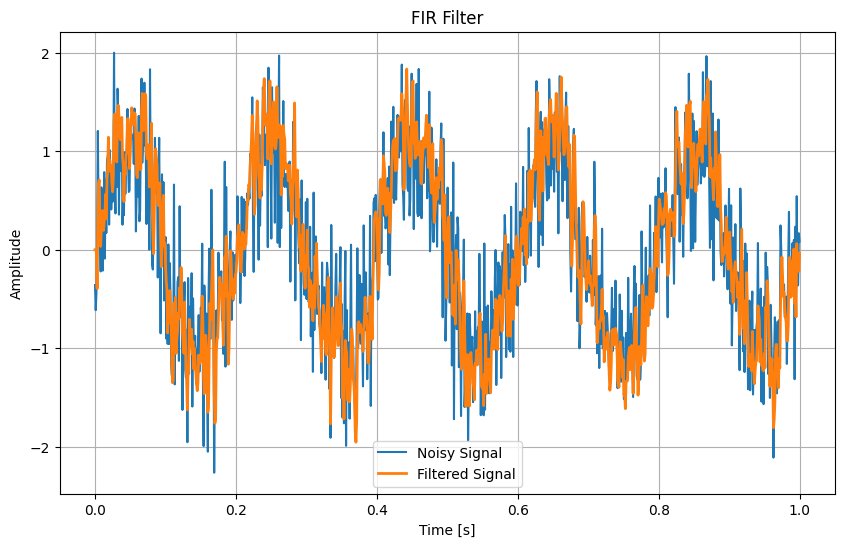

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fir_filter(x, b):
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))  # Signal with noise
b = [0.4, 0.4, 0.4]  # FIR coefficients

y = fir_filter(x, b)

plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("FIR Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

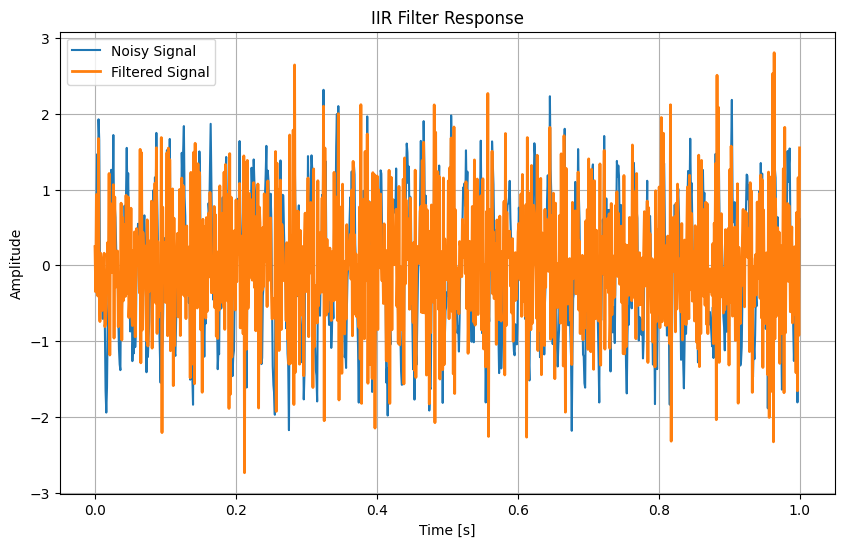

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def iir_filter(x, b, a):
    M = len(b)  # Length of numerator coefficients (b)
    N = len(a)  # Length of denominator coefficients (a)
    y = np.zeros(len(x))  # Initialize output signal array

    # Apply filter to each sample in the input signal
    for n in range(len(x)):
        # Numerator part (feedforward)
        # Ensure we use the correct slice length for the convolution
        x_slice = x[max(0, n-M+1):n+1]  # Input signal slice
        y[n] = np.dot(b[:len(x_slice)], x_slice[::-1])  # Apply reverse convolution for numerator

        # Denominator part (feedback), skip the first sample
        if n >= 1:
            # Ensure we use the correct slice length for the feedback part
            y_slice = y[max(0, n-N+1):n]  # Output signal slice
            y[n] -= np.dot(a[1:min(N, len(y_slice)+1)], y_slice[::-1])  # Apply reverse convolution for feedback

    return y

# Example usage and plotting
# Create a noisy signal (for example, a sine wave with noise)
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.randn(len(t))  # Noisy signal

# IIR filter coefficients
a = [1, 0.5]  # Denominator coefficients (a_0 = 1 by convention)
b = [1, -0.6]  # Numerator coefficients

# Apply the filter to the noisy signal
y = iir_filter(x, b, a)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("IIR Filter Response")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()